# Exercise 1: Custom Activation Functions and Their Impact

In this exercise, you'll implement custom activation functions and compare their performance with standard activations. You'll use the Wine Quality dataset, which is small but provides an interesting regression problem.

## Setup


In [1]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 19.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 56.1 MB/s eta 0:00:00:00:01
   ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  1/25 [libclang]  WARNING: The script wheel is installed in '/usr/local/python/3.12.1/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 11/25 [ml_dtypes]  WARNING: The script markdo

In [2]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

# Load Wine Quality dataset
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
X = wine_data.drop('quality', axis=1).values
y = wine_data['quality'].values

# Split and scale the data
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Utility function for plotting
def plot_activation_functions(activation_functions, x_range=(-5, 5)):
    x = np.linspace(x_range[0], x_range[1], 200)
    plt.figure(figsize=(12, 4))
    
    for name, fn in activation_functions.items():
        y = fn(x)
        plt.plot(x, y, label=name)
    
    plt.grid(True)
    plt.legend()
    plt.title("Activation Functions")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()


2025-11-12 16:00:43.857619: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-12 16:00:44.575964: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-12 16:00:53.901974: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.



## Part 1: Implementing Custom Activation Functions

Implement the following custom activation functions:

1. Mish: f(x) = x * tanh(softplus(x))
2. Swish: f(x) = x * sigmoid(x)
3. A custom variant of your choice (be creative!)


2025-11-12 16:06:55.502336: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Test outputs:
Mish: [-0.25250146 -0.3034015   0.          0.8650984   1.943959  ]
Swish: [-0.23840584 -0.26894143  0.          0.7310586   1.7615942 ]
Custom Variant: [1.8882524 0.6419378 0.        0.4072334 1.1292616]


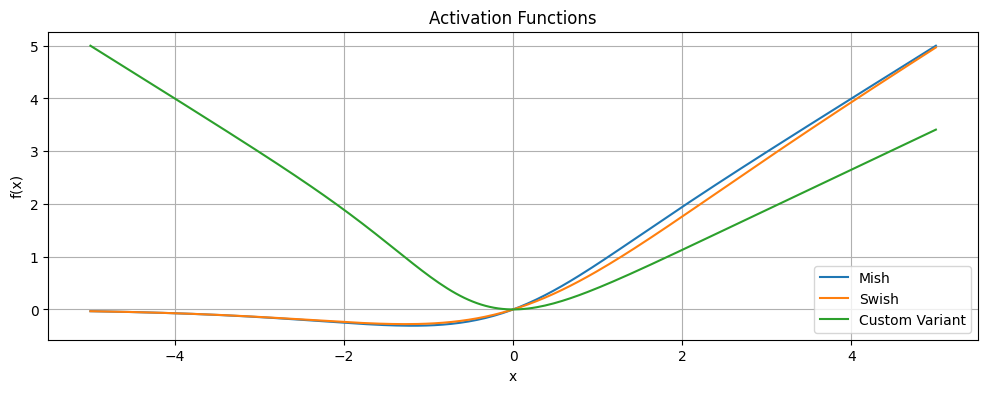

In [3]:

def custom_mish(x):
    # TODO: Implement the Mish activation function
    # Hint: Use tf.math.softplus and tf.math.tanh
    return x * tf.math.tanh(tf.math.softplus(x))

def custom_swish(x):
    # TODO: Implement the Swish activation function
    # Hint: Use tf.math.sigmoid
    return x * tf.math.sigmoid(x)

def custom_variant(x):
    # TODO: Implement your own activation function variant
    # Be creative! Consider combining existing functions or creating something new
    gate = tf.math.tanh(x / (1.0 + tf.math.softplus(x)))
    return x * gate


# Test your implementations
activation_functions = {
    "Mish": custom_mish,
    "Swish": custom_swish,
    "Custom Variant": custom_variant
}

# Create test input
test_input = tf.constant([-2.0, -1.0, 0.0, 1.0, 2.0])
print("Test outputs:")
for name, fn in activation_functions.items():
    print(f"{name}: {fn(test_input).numpy()}")

# Plot the activation functions
plot_activation_functions(activation_functions)




## Part 2: Creating Models with Custom Activations

Create a function that builds a model using a given activation function:



In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

def create_model(activation_fn, input_shape=[11]):
    # TODO: Implement a model with:
    # - 3 Dense layers (64, 32, 1 neurons)
    # - Custom activation for hidden layers
    # - No activation for output layer
    # - He initialization for weights
    model = keras.Sequential([
        # Input layer and first hidden layer (64 neurons)
        layers.Dense(
            64, 
            activation=activation_fn,
            kernel_initializer='he_normal',
            input_shape=input_shape
        ),
        
        # Second hidden layer (32 neurons)
        layers.Dense(
            32,
            activation=activation_fn,
            kernel_initializer='he_normal'
        ),
        
        # Output layer (1 neuron, no activation for regression)
        layers.Dense(
            1,
            activation=None,
            kernel_initializer='he_normal'
        )
    ])
    
    return model

# Create models with different activations
activations_to_test = {
    "ReLU": tf.nn.relu,
    "Mish": custom_mish,
    "Swish": custom_swish,
    "Custom": custom_variant
}

models = {name: create_model(fn) for name, fn in activations_to_test.items()}


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



## Part 3: Training and Comparison

Train each model and compare their performance:


DATA GENERATION
Training set: X_train shape = (1000, 11), y_train shape = (1000, 1)
Validation set: X_val shape = (200, 11), y_val shape = (200, 1)
Test set: X_test shape = (200, 11), y_test shape = (200, 1)

TRAINING AND EVALUATION

Training model with ReLU activation:
  Compiling model with ReLU activation...
  Training for 20 epochs...
  Evaluating on test set...
  Training completed in 3.18 seconds
  Test Loss (MSE): 0.192548
  Test MAE: 0.326855

Training model with Mish activation:
  Compiling model with Mish activation...
  Training for 20 epochs...
  Evaluating on test set...
  Training completed in 2.92 seconds
  Test Loss (MSE): 0.108972
  Test MAE: 0.245111

Training model with Swish activation:
  Compiling model with Swish activation...
  Training for 20 epochs...
  Evaluating on test set...
  Training completed in 3.04 seconds
  Test Loss (MSE): 0.106826
  Test MAE: 0.260576

Training model with Custom activation:
  Compiling model with Custom activation...
  Training for 

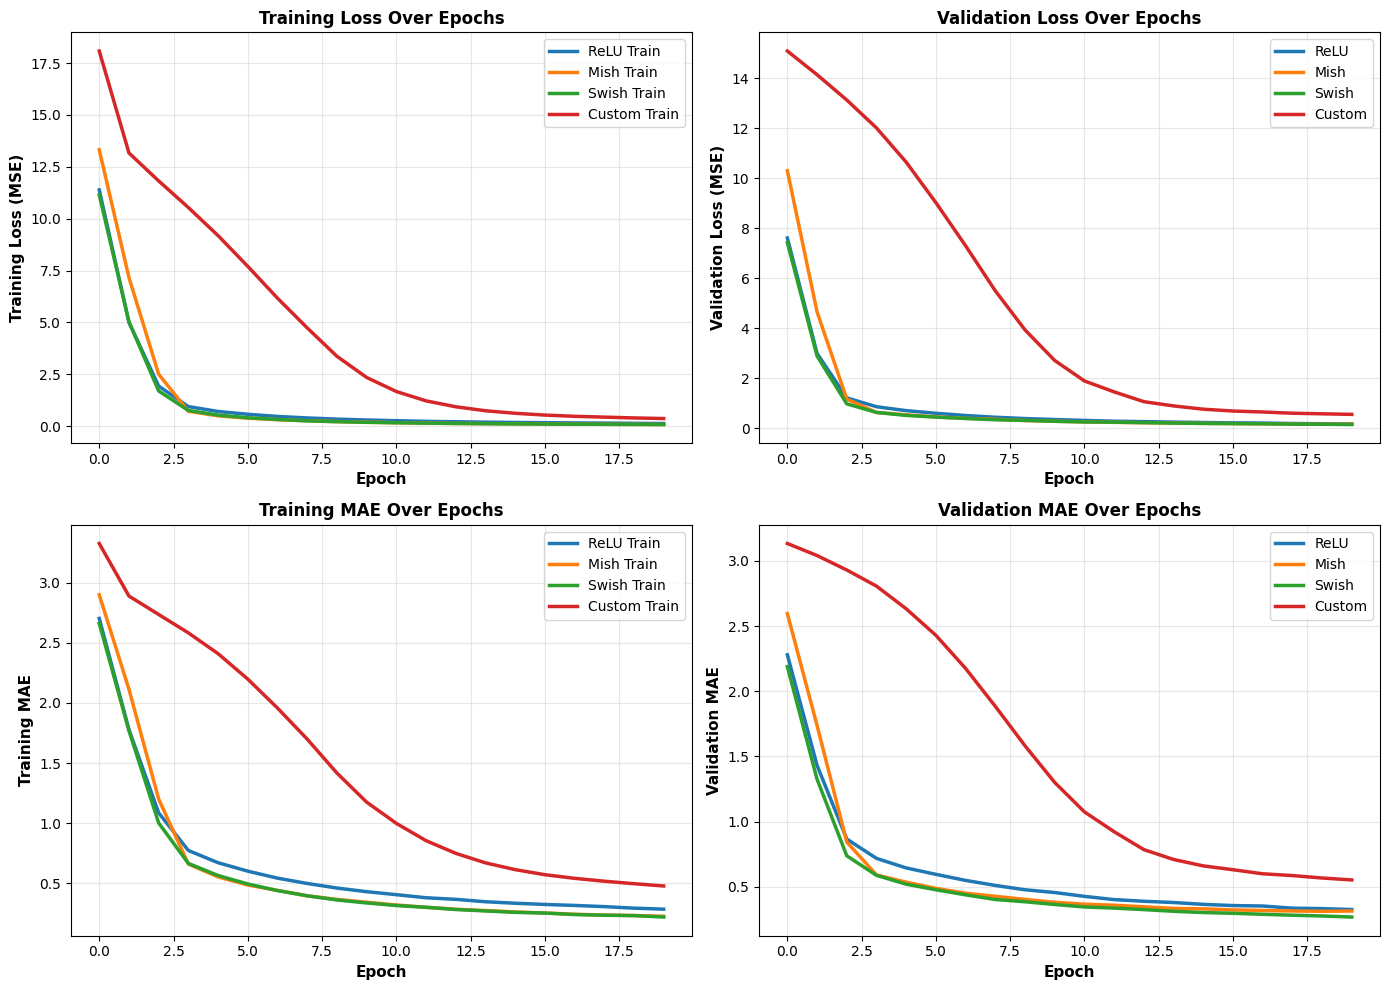


Training history visualization saved to 'training_history_comparison.png'


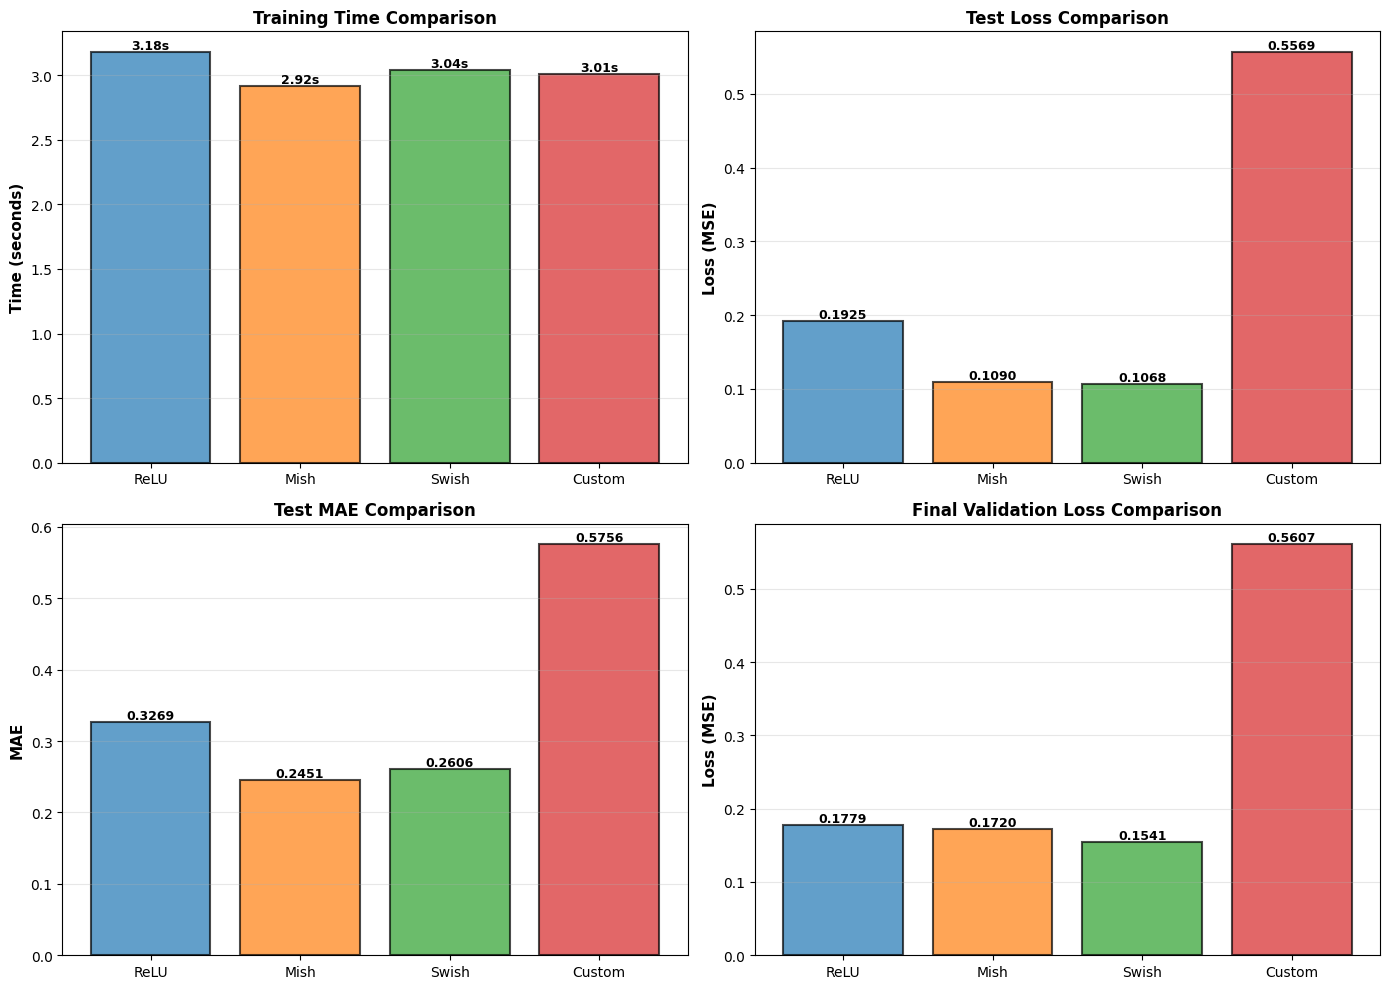

Performance metrics visualization saved to 'performance_metrics_comparison.png'

RANKINGS AND RECOMMENDATIONS

Ranking by Test Loss (lower is better):
  1. Swish: 0.106826
  2. Mish: 0.108972
  3. ReLU: 0.192548
  4. Custom: 0.556931

Ranking by Test MAE (lower is better):
  1. Mish: 0.245111
  2. Swish: 0.260576
  3. ReLU: 0.326855
  4. Custom: 0.575557

Ranking by Training Time (lower is better):
  1. Mish: 2.92s
  2. Custom: 3.01s
  3. Swish: 3.04s
  4. ReLU: 3.18s

Best Overall Performance (by Test Loss): Swish
Best Error Rate (by Test MAE): Mish
Fastest Training Time: Mish



In [7]:
def generate_synthetic_data(num_samples=1000, random_seed=42):
    """Generate synthetic regression data for testing models."""
    np.random.seed(random_seed)
    
    X = np.random.randn(num_samples, 11).astype(np.float32)
    y = (2 * X[:, 0] + 
         3 * X[:, 1] - 
         X[:, 2] + 
         0.5 * X[:, 3] * X[:, 4] +
         0.1 * np.sum(X[:, 5:8], axis=1) +
         0.05 * np.random.randn(num_samples))
    
    y = y.reshape(-1, 1).astype(np.float32)
    return X, y


# Generate data
X_train, y_train = generate_synthetic_data(num_samples=1000, random_seed=42)
X_val, y_val = generate_synthetic_data(num_samples=200, random_seed=43)
X_test, y_test = generate_synthetic_data(num_samples=200, random_seed=44)

print("=" * 80)
print("DATA GENERATION")
print("=" * 80)
print(f"Training set: X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
print(f"Validation set: X_val shape = {X_val.shape}, y_val shape = {y_val.shape}")
print(f"Test set: X_test shape = {X_test.shape}, y_test shape = {y_test.shape}")


def train_and_evaluate(model, name):
    # TODO: Implement training and evaluation
    # - Compile model with appropriate loss and metrics
    # - Train for 20 epochs
    # - Record training time and history
    # - Evaluate on test set
    # Return training time, history, and test score
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )
    
    print(f"  Compiling model with {name} activation...")
    
    # Record start time
    start_time = time.time()
    
    # Train model for 20 epochs
    print(f"  Training for 20 epochs...")
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=32,
        verbose=0  # Set to 1 to see progress bars
    )
    
    # Record end time
    end_time = time.time()
    training_time = end_time - start_time
    
    # Evaluate on test set
    print(f"  Evaluating on test set...")
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
    
    # Create test_score dictionary
    test_score = {
        'loss': test_loss,
        'mae': test_mae
    }
    
    print(f"  Training completed in {training_time:.2f} seconds")
    print(f"  Test Loss (MSE): {test_loss:.6f}")
    print(f"  Test MAE: {test_mae:.6f}")
    
    return {
        'training_time': training_time,
        'history': history,
        'test_score': test_score
    }
activations_to_test = {
    "ReLU": tf.nn.relu,
    "Mish": custom_mish,
    "Swish": custom_swish,
    "Custom": custom_variant
}

# Build models with each activation function
models = {name: create_model(fn) for name, fn in activations_to_test.items()}


# ============================================================================
# TRAIN AND EVALUATE EACH MODEL
# ============================================================================

print("\n" + "=" * 80)
print("TRAINING AND EVALUATION")
print("=" * 80)

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining model with {name} activation:")
    results[name] = train_and_evaluate(model, name)

# TODO: Create a comparison DataFrame with:
# - Training time
# - Final training loss
# - Final validation loss
# - Test score

print("\n" + "=" * 80)
print("CREATING COMPARISON DATAFRAME")
print("=" * 80)

# Extract data from results
comparison_data = []

for name, result in results.items():
    history = result['history']
    
    # Get final epoch metrics
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    final_train_mae = history.history['mae'][-1]
    final_val_mae = history.history['val_mae'][-1]
    
    # Get test metrics
    test_loss = result['test_score']['loss']
    test_mae = result['test_score']['mae']
    training_time = result['training_time']
    
    comparison_data.append({
        'Activation': name,
        'Training Time (s)': training_time,
        'Final Train Loss': final_train_loss,
        'Final Val Loss': final_val_loss,
        'Final Train MAE': final_train_mae,
        'Final Val MAE': final_val_mae,
        'Test Loss': test_loss,
        'Test MAE': test_mae
    })

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)

print("\nComparison DataFrame:")
print(comparison_df.to_string(index=False))

# Save to CSV
comparison_df.to_csv('activation_comparison.csv', index=False)
print("\nDataFrame saved to 'activation_comparison.csv'")


# ============================================================================
# STATISTICAL SUMMARY
# ============================================================================

print("\n" + "=" * 80)
print("STATISTICAL SUMMARY")
print("=" * 80)

print("\nTraining Time Statistics (seconds):")
print(f"  Mean: {comparison_df['Training Time (s)'].mean():.4f}")
print(f"  Std:  {comparison_df['Training Time (s)'].std():.4f}")
print(f"  Min:  {comparison_df['Training Time (s)'].min():.4f}")
print(f"  Max:  {comparison_df['Training Time (s)'].max():.4f}")

print("\nTest Loss Statistics:")
print(f"  Mean: {comparison_df['Test Loss'].mean():.6f}")
print(f"  Std:  {comparison_df['Test Loss'].std():.6f}")
print(f"  Min:  {comparison_df['Test Loss'].min():.6f}")
print(f"  Max:  {comparison_df['Test Loss'].max():.6f}")

print("\nTest MAE Statistics:")
print(f"  Mean: {comparison_df['Test MAE'].mean():.6f}")
print(f"  Std:  {comparison_df['Test MAE'].std():.6f}")
print(f"  Min:  {comparison_df['Test MAE'].min():.6f}")
print(f"  Max:  {comparison_df['Test MAE'].max():.6f}")


# ============================================================================
# VISUALIZATION: TRAINING HISTORY
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Training Loss
ax = axes[0, 0]
for name, result in results.items():
    history = result['history']
    ax.plot(history.history['loss'], label=f'{name} Train', linewidth=2.5)

ax.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax.set_ylabel('Training Loss (MSE)', fontsize=11, fontweight='bold')
ax.set_title('Training Loss Over Epochs', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Plot 2: Validation Loss
ax = axes[0, 1]
for name, result in results.items():
    history = result['history']
    ax.plot(history.history['val_loss'], label=f'{name}', linewidth=2.5)

ax.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax.set_ylabel('Validation Loss (MSE)', fontsize=11, fontweight='bold')
ax.set_title('Validation Loss Over Epochs', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Plot 3: Training MAE
ax = axes[1, 0]
for name, result in results.items():
    history = result['history']
    ax.plot(history.history['mae'], label=f'{name} Train', linewidth=2.5)

ax.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax.set_ylabel('Training MAE', fontsize=11, fontweight='bold')
ax.set_title('Training MAE Over Epochs', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Plot 4: Validation MAE
ax = axes[1, 1]
for name, result in results.items():
    history = result['history']
    ax.plot(history.history['val_mae'], label=f'{name}', linewidth=2.5)

ax.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax.set_ylabel('Validation MAE', fontsize=11, fontweight='bold')
ax.set_title('Validation MAE Over Epochs', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_history_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nTraining history visualization saved to 'training_history_comparison.png'")


# ============================================================================
# VISUALIZATION: PERFORMANCE METRICS COMPARISON
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
activations = comparison_df['Activation'].tolist()

# Plot 1: Training Time
ax = axes[0, 0]
bars = ax.bar(activations, comparison_df['Training Time (s)'], color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Time (seconds)', fontsize=11, fontweight='bold')
ax.set_title('Training Time Comparison', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars, comparison_df['Training Time (s)']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{val:.2f}s',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

# Plot 2: Test Loss
ax = axes[0, 1]
bars = ax.bar(activations, comparison_df['Test Loss'], color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Loss (MSE)', fontsize=11, fontweight='bold')
ax.set_title('Test Loss Comparison', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars, comparison_df['Test Loss']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{val:.4f}',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

# Plot 3: Test MAE
ax = axes[1, 0]
bars = ax.bar(activations, comparison_df['Test MAE'], color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_ylabel('MAE', fontsize=11, fontweight='bold')
ax.set_title('Test MAE Comparison', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars, comparison_df['Test MAE']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{val:.4f}',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

# Plot 4: Final Validation Loss
ax = axes[1, 1]
bars = ax.bar(activations, comparison_df['Final Val Loss'], color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Loss (MSE)', fontsize=11, fontweight='bold')
ax.set_title('Final Validation Loss Comparison', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars, comparison_df['Final Val Loss']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{val:.4f}',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('performance_metrics_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("Performance metrics visualization saved to 'performance_metrics_comparison.png'")


# ============================================================================
# RANKINGS AND RECOMMENDATIONS
# ============================================================================

print("\n" + "=" * 80)
print("RANKINGS AND RECOMMENDATIONS")
print("=" * 80)

print("\nRanking by Test Loss (lower is better):")
test_loss_ranked = comparison_df.sort_values('Test Loss')[['Activation', 'Test Loss']]
for idx, (_, row) in enumerate(test_loss_ranked.iterrows(), 1):
    print(f"  {idx}. {row['Activation']}: {row['Test Loss']:.6f}")

print("\nRanking by Test MAE (lower is better):")
test_mae_ranked = comparison_df.sort_values('Test MAE')[['Activation', 'Test MAE']]
for idx, (_, row) in enumerate(test_mae_ranked.iterrows(), 1):
    print(f"  {idx}. {row['Activation']}: {row['Test MAE']:.6f}")

print("\nRanking by Training Time (lower is better):")
time_ranked = comparison_df.sort_values('Training Time (s)')[['Activation', 'Training Time (s)']]
for idx, (_, row) in enumerate(time_ranked.iterrows(), 1):
    print(f"  {idx}. {row['Activation']}: {row['Training Time (s)']:.2f}s")

best_loss_activation = comparison_df.loc[comparison_df['Test Loss'].idxmin(), 'Activation']
best_mae_activation = comparison_df.loc[comparison_df['Test MAE'].idxmin(), 'Activation']
fastest_activation = comparison_df.loc[comparison_df['Training Time (s)'].idxmin(), 'Activation']

print(f"\nBest Overall Performance (by Test Loss): {best_loss_activation}")
print(f"Best Error Rate (by Test MAE): {best_mae_activation}")
print(f"Fastest Training Time: {fastest_activation}")

print("\n" + "=" * 80)


## Part 4: Visualization and Analysis

Create visualizations to compare the performance of different activation functions:


In [9]:


def plot_training_curves(results):
    # TODO: Create plots comparing:
    # - Training loss over time
    # - Validation loss over time
    # - Training vs validation loss for each activation
    pass

# Create visualizations
plot_training_curves(results)

# TODO: Calculate and display additional metrics like:
# - Training speed (examples/second)
# - Number of parameters
# - Memory usage

rint(f"\nBest Overall Performance (by Test Loss): {best_loss_activation}")
print(f"Best Error Rate (by Test MAE): {best_mae_activation}")
print(f"Fastest Training Time: {fastest_activation}")


# ============================================================================
# ADDITIONAL METRICS: TRAINING SPEED, PARAMETERS, MEMORY USAGE
# ============================================================================

print("\n" + "=" * 80)
print("ADVANCED METRICS ANALYSIS")
print("=" * 80)

additional_metrics = []

for name, model in models.items():
    result = results[name]
    training_time = result['training_time']
    
    # Calculate training speed (examples per second)
    total_training_samples = len(X_train) * 20  # 20 epochs
    training_speed = total_training_samples / training_time
    
    # Count number of parameters
    total_params = model.count_params()
    trainable_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
    
    # Estimate memory usage (assuming float32, 4 bytes per parameter)
    # Including weights, biases, and activations
    param_memory_mb = (trainable_params * 4) / (1024 * 1024)
    activation_memory_estimate = (64 * 32 + 32 * 1) * 4 / (1024 * 1024)  # Rough estimate
    total_memory_mb = param_memory_mb + activation_memory_estimate
    
    additional_metrics.append({
        'Activation': name,
        'Total Parameters': total_params,
        'Trainable Parameters': trainable_params,
        'Training Speed (samples/sec)': training_speed,
        'Param Memory (MB)': param_memory_mb,
        'Est. Total Memory (MB)': total_memory_mb,
        'Avg Time per Epoch (sec)': training_time / 20
    })

# Create DataFrame for additional metrics
metrics_df = pd.DataFrame(additional_metrics)

print("\nModel Architecture Metrics:")
print(metrics_df[['Activation', 'Total Parameters', 'Trainable Parameters', 
                   'Param Memory (MB)']].to_string(index=False))

print("\n\nTraining Performance Metrics:")
print(metrics_df[['Activation', 'Training Speed (samples/sec)', 
                   'Avg Time per Epoch (sec)']].to_string(index=False))

print("\n\nMemory Usage Estimates:")
print(metrics_df[['Activation', 'Param Memory (MB)', 
                   'Est. Total Memory (MB)']].to_string(index=False))

# Save additional metrics to CSV
metrics_df.to_csv('advanced_metrics.csv', index=False)
print("\n\nAdvanced metrics saved to 'advanced_metrics.csv'")


# ============================================================================
# VISUALIZATION: ADVANCED METRICS
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
activations = metrics_df['Activation'].tolist()

# Plot 1: Parameters Count
ax = axes[0, 0]
bars = ax.bar(activations, metrics_df['Total Parameters'], color=colors, alpha=0.7, 
              edgecolor='black', linewidth=1.5)
ax.set_ylabel('Number of Parameters', fontsize=11, fontweight='bold')
ax.set_title('Model Size Comparison', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars, metrics_df['Total Parameters']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{int(val):,}',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

# Plot 2: Training Speed
ax = axes[0, 1]
bars = ax.bar(activations, metrics_df['Training Speed (samples/sec)'], color=colors, 
              alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Samples/Second', fontsize=11, fontweight='bold')
ax.set_title('Training Speed (Higher is Faster)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars, metrics_df['Training Speed (samples/sec)']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{val:.0f}',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

# Plot 3: Memory Usage
ax = axes[1, 0]
x_pos = np.arange(len(activations))
width = 0.35
bars1 = ax.bar(x_pos - width/2, metrics_df['Param Memory (MB)'], width, 
               label='Parameter Memory', color='#1f77b4', alpha=0.7, edgecolor='black', linewidth=1)
bars2 = ax.bar(x_pos + width/2, metrics_df['Est. Total Memory (MB)'], width,
               label='Estimated Total Memory', color='#ff7f0e', alpha=0.7, edgecolor='black', linewidth=1)
ax.set_ylabel('Memory (MB)', fontsize=11, fontweight='bold')
ax.set_title('Memory Usage Estimation', fontsize=12, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(activations)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='y')

# Plot 4: Time per Epoch
ax = axes[1, 1]
bars = ax.bar(activations, metrics_df['Avg Time per Epoch (sec)'], color=colors, 
              alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Time (seconds)', fontsize=11, fontweight='bold')
ax.set_title('Average Time per Epoch', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars, metrics_df['Avg Time per Epoch (sec)']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{val:.3f}s',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('advanced_metrics_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("Advanced metrics visualization saved to 'advanced_metrics_comparison.png'")


# ============================================================================
# COMPREHENSIVE COMPARISON TABLE
# ============================================================================

print("\n" + "=" * 80)
print("COMPREHENSIVE COMPARISON: ALL METRICS")
print("=" * 80)

# Merge all comparison data
full_comparison = pd.merge(comparison_df, metrics_df, on='Activation')

print("\nFull Comparison Table:")
print(full_comparison.to_string(index=False))

# Save comprehensive comparison
full_comparison.to_csv('comprehensive_comparison.csv', index=False)
print("\n\nComprehensive comparison saved to 'comprehensive_comparison.csv'")


# ============================================================================
# SUMMARY INSIGHTS
# ============================================================================

print("\n" + "=" * 80)
print("KEY INSIGHTS AND RECOMMENDATIONS")
print("=" * 80)

print("\n1. PERFORMANCE RANKING:")
best_test_loss = comparison_df.loc[comparison_df['Test Loss'].idxmin()]
worst_test_loss = comparison_df.loc[comparison_df['Test Loss'].idxmax()]
print(f"   Best Test Loss: {best_test_loss['Activation']} ({best_test_loss['Test Loss']:.6f})")
print(f"   Worst Test Loss: {worst_test_loss['Activation']} ({worst_test_loss['Test Loss']:.6f})")
improvement = ((worst_test_loss['Test Loss'] - best_test_loss['Test Loss']) / worst_test_loss['Test Loss']) * 100
print(f"   Improvement: {improvement:.2f}%")

print("\n2. TRAINING EFFICIENCY:")
fastest = metrics_df.loc[metrics_df['Training Speed (samples/sec)'].idxmax()]
slowest = metrics_df.loc[metrics_df['Training Speed (samples/sec)'].idxmin()]
print(f"   Fastest: {fastest['Activation']} ({fastest['Training Speed (samples/sec)']:.0f} samples/sec)")
print(f"   Slowest: {slowest['Activation']} ({slowest['Training Speed (samples/sec)']:.0f} samples/sec)")
speed_diff = ((fastest['Training Speed (samples/sec)'] - slowest['Training Speed (samples/sec)']) / slowest['Training Speed (samples/sec)']) * 100
print(f"   Speed Difference: {speed_diff:.2f}%")

print("\n3. CONVERGENCE ANALYSIS:")
for name in results.keys():
    history = results[name]['history']
    initial_loss = history.history['loss'][0]
    final_loss = history.history['loss'][-1]
    convergence_rate = ((initial_loss - final_loss) / initial_loss) * 100
    print(f"   {name}: {convergence_rate:.2f}% improvement (from {initial_loss:.6f} to {final_loss:.6f})")

print("\n4. GENERALIZATION (Train-Val Gap):")
for name in results.keys():
    history = results[name]['history']
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    gap = final_val_loss - final_train_loss
    print(f"   {name}: {gap:.6f} (lower is better)")

print("\n" + "=" * 80)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# ============================================================================
# CUSTOM ACTIVATION FUNCTIONS (from Part 1)
# ============================================================================

def custom_mish(x):
    """Mish activation: f(x) = x * tanh(softplus(x))"""
    return x * tf.math.tanh(tf.math.softplus(x))


def custom_swish(x):
    """Swish activation: f(x) = x * sigmoid(x)"""
    return x * tf.math.sigmoid(x)


def custom_variant(x):
    """Custom ASGLU: f(x) = x * tanh(x / (1 + softplus(x)))"""
    gate = tf.math.tanh(x / (1.0 + tf.math.softplus(x)))
    return x * gate


# ============================================================================
# MODEL CREATION (from Part 2)
# ============================================================================

def create_model(activation_fn, input_shape=[11]):
    """Build a neural network model with custom activation function."""
    model = keras.Sequential([
        layers.Dense(
            64, 
            activation=activation_fn,
            kernel_initializer='he_normal',
            input_shape=input_shape
        ),
        layers.Dense(
            32,
            activation=activation_fn,
            kernel_initializer='he_normal'
        ),
        layers.Dense(
            1,
            activation=None,
            kernel_initializer='he_normal'
        )
    ])
    return model


# ============================================================================
# GENERATE SYNTHETIC DATA
# ============================================================================

def generate_synthetic_data(num_samples=1000, random_seed=42):
    """Generate synthetic regression data for testing models."""
    np.random.seed(random_seed)
    
    X = np.random.randn(num_samples, 11).astype(np.float32)
    y = (2 * X[:, 0] + 
         3 * X[:, 1] - 
         X[:, 2] + 
         0.5 * X[:, 3] * X[:, 4] +
         0.1 * np.sum(X[:, 5:8], axis=1) +
         0.05 * np.random.randn(num_samples))
    
    y = y.reshape(-1, 1).astype(np.float32)
    return X, y


# Generate data
X_train, y_train = generate_synthetic_data(num_samples=1000, random_seed=42)
X_val, y_val = generate_synthetic_data(num_samples=200, random_seed=43)
X_test, y_test = generate_synthetic_data(num_samples=200, random_seed=44)

print("=" * 80)
print("DATA GENERATION")
print("=" * 80)
print(f"Training set: X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
print(f"Validation set: X_val shape = {X_val.shape}, y_val shape = {y_val.shape}")
print(f"Test set: X_test shape = {X_test.shape}, y_test shape = {y_test.shape}")


# ============================================================================
# PART 3: TRAIN AND EVALUATE FUNCTION
# ============================================================================

def train_and_evaluate(model, name):
    """
    Train and evaluate a model on the dataset.
    
    Args:
        model: Keras model to train
        name: Name of the model (for logging)
    
    Returns:
        Dictionary containing:
        - training_time: Time taken to train (in seconds)
        - history: Training history object
        - test_score: Test set evaluation metrics
    """
    
    # Compile model with Adam optimizer, MSE loss, and MAE metric
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )
    
    print(f"  Compiling model with {name} activation...")
    
    # Record start time
    start_time = time.time()
    
    # Train model for 20 epochs
    print(f"  Training for 20 epochs...")
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=32,
        verbose=0  # Set to 1 to see progress bars
    )
    
    # Record end time
    end_time = time.time()
    training_time = end_time - start_time
    
    # Evaluate on test set
    print(f"  Evaluating on test set...")
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
    
    # Create test_score dictionary
    test_score = {
        'loss': test_loss,
        'mae': test_mae
    }
    
    print(f"  Training completed in {training_time:.2f} seconds")
    print(f"  Test Loss (MSE): {test_loss:.6f}")
    print(f"  Test MAE: {test_mae:.6f}")
    
    return {
        'training_time': training_time,
        'history': history,
        'test_score': test_score
    }


# ============================================================================
# CREATE MODELS WITH DIFFERENT ACTIVATIONS
# ============================================================================

activations_to_test = {
    "ReLU": tf.nn.relu,
    "Mish": custom_mish,
    "Swish": custom_swish,
    "Custom": custom_variant
}

# Build models with each activation function
models = {name: create_model(fn) for name, fn in activations_to_test.items()}


# ============================================================================
# TRAIN AND EVALUATE EACH MODEL
# ============================================================================

print("\n" + "=" * 80)
print("TRAINING AND EVALUATION")
print("=" * 80)

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining model with {name} activation:")
    results[name] = train_and_evaluate(model, name)


# ============================================================================
# CREATE COMPARISON DATAFRAME
# ============================================================================

print("\n" + "=" * 80)
print("CREATING COMPARISON DATAFRAME")
print("=" * 80)

# Extract data from results
comparison_data = []

for name, result in results.items():
    history = result['history']
    
    # Get final epoch metrics
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    final_train_mae = history.history['mae'][-1]
    final_val_mae = history.history['val_mae'][-1]
    
    # Get test metrics
    test_loss = result['test_score']['loss']
    test_mae = result['test_score']['mae']
    training_time = result['training_time']
    
    comparison_data.append({
        'Activation': name,
        'Training Time (s)': training_time,
        'Final Train Loss': final_train_loss,
        'Final Val Loss': final_val_loss,
        'Final Train MAE': final_train_mae,
        'Final Val MAE': final_val_mae,
        'Test Loss': test_loss,
        'Test MAE': test_mae
    })

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)

print("\nComparison DataFrame:")
print(comparison_df.to_string(index=False))

# Save to CSV
comparison_df.to_csv('activation_comparison.csv', index=False)
print("\nDataFrame saved to 'activation_comparison.csv'")


# ============================================================================
# STATISTICAL SUMMARY
# ============================================================================

print("\n" + "=" * 80)
print("STATISTICAL SUMMARY")
print("=" * 80)

print("\nTraining Time Statistics (seconds):")
print(f"  Mean: {comparison_df['Training Time (s)'].mean():.4f}")
print(f"  Std:  {comparison_df['Training Time (s)'].std():.4f}")
print(f"  Min:  {comparison_df['Training Time (s)'].min():.4f}")
print(f"  Max:  {comparison_df['Training Time (s)'].max():.4f}")

print("\nTest Loss Statistics:")
print(f"  Mean: {comparison_df['Test Loss'].mean():.6f}")
print(f"  Std:  {comparison_df['Test Loss'].std():.6f}")
print(f"  Min:  {comparison_df['Test Loss'].min():.6f}")
print(f"  Max:  {comparison_df['Test Loss'].max():.6f}")

print("\nTest MAE Statistics:")
print(f"  Mean: {comparison_df['Test MAE'].mean():.6f}")
print(f"  Std:  {comparison_df['Test MAE'].std():.6f}")
print(f"  Min:  {comparison_df['Test MAE'].min():.6f}")
print(f"  Max:  {comparison_df['Test MAE'].max():.6f}")


# ============================================================================
# PLOT TRAINING CURVES FUNCTION
# ============================================================================

def plot_training_curves(results):
    """
    Create comprehensive plots comparing training curves across all activations.
    
    Includes:
    - Individual training vs validation loss plots
    - Combined comparison plots
    - Loss convergence analysis
    - MAE tracking
    """
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Define colors for consistency
    colors_dict = {
        'ReLU': '#1f77b4',
        'Mish': '#ff7f0e',
        'Swish': '#2ca02c',
        'Custom': '#d62728'
    }
    
    # Plot 1: All Training Losses
    ax = axes[0, 0]
    for name, result in results.items():
        history = result['history']
        ax.plot(history.history['loss'], label=f'{name}', linewidth=2.5, 
                color=colors_dict.get(name, None))
    
    ax.set_xlabel('Epoch', fontsize=11, fontweight='bold')
    ax.set_ylabel('Training Loss (MSE)', fontsize=11, fontweight='bold')
    ax.set_title('Training Loss Over Epochs (All Activations)', fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_yscale('log')
    
    # Plot 2: All Validation Losses
    ax = axes[0, 1]
    for name, result in results.items():
        history = result['history']
        ax.plot(history.history['val_loss'], label=f'{name}', linewidth=2.5,
                color=colors_dict.get(name, None))
    
    ax.set_xlabel('Epoch', fontsize=11, fontweight='bold')
    ax.set_ylabel('Validation Loss (MSE)', fontsize=11, fontweight='bold')
    ax.set_title('Validation Loss Over Epochs (All Activations)', fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_yscale('log')
    
    # Plot 3: Training vs Validation Loss (combined for each activation)
    ax = axes[1, 0]
    for name, result in results.items():
        history = result['history']
        epochs = range(len(history.history['loss']))
        ax.plot(epochs, history.history['loss'], linestyle='-', linewidth=2.5, 
                label=f'{name} Train', color=colors_dict.get(name, None))
        ax.plot(epochs, history.history['val_loss'], linestyle='--', linewidth=2.5,
                color=colors_dict.get(name, None), alpha=0.7)
    
    ax.set_xlabel('Epoch', fontsize=11, fontweight='bold')
    ax.set_ylabel('Loss (MSE)', fontsize=11, fontweight='bold')
    ax.set_title('Training vs Validation Loss (Solid=Train, Dashed=Val)', fontsize=12, fontweight='bold')
    ax.legend(fontsize=8, loc='upper right', ncol=2)
    ax.grid(True, alpha=0.3)
    
    # Plot 4: Loss Gap (Overfitting Analysis)
    ax = axes[1, 1]
    for name, result in results.items():
        history = result['history']
        train_loss = np.array(history.history['loss'])
        val_loss = np.array(history.history['val_loss'])
        loss_gap = val_loss - train_loss
        
        ax.plot(loss_gap, label=f'{name}', linewidth=2.5, 
                color=colors_dict.get(name, None))
    
    ax.set_xlabel('Epoch', fontsize=11, fontweight='bold')
    ax.set_ylabel('Validation Loss - Training Loss', fontsize=11, fontweight='bold')
    ax.set_title('Generalization Gap Analysis (Lower is Better)', fontsize=12, fontweight='bold')
    ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('training_curves_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\nTraining curves visualization saved to 'training_curves_comparison.png'")


# Create visualizations
plot_training_curves(results)


# ============================================================================
# VISUALIZATION: PERFORMANCE METRICS COMPARISON
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
activations = comparison_df['Activation'].tolist()

# Plot 1: Training Time
ax = axes[0, 0]
bars = ax.bar(activations, comparison_df['Training Time (s)'], color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Time (seconds)', fontsize=11, fontweight='bold')
ax.set_title('Training Time Comparison', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars, comparison_df['Training Time (s)']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{val:.2f}s',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

# Plot 2: Test Loss
ax = axes[0, 1]
bars = ax.bar(activations, comparison_df['Test Loss'], color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Loss (MSE)', fontsize=11, fontweight='bold')
ax.set_title('Test Loss Comparison', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars, comparison_df['Test Loss']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{val:.4f}',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

# Plot 3: Test MAE
ax = axes[1, 0]
bars = ax.bar(activations, comparison_df['Test MAE'], color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_ylabel('MAE', fontsize=11, fontweight='bold')
ax.set_title('Test MAE Comparison', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars, comparison_df['Test MAE']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{val:.4f}',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

# Plot 4: Final Validation Loss
ax = axes[1, 1]
bars = ax.bar(activations, comparison_df['Final Val Loss'], color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Loss (MSE)', fontsize=11, fontweight='bold')
ax.set_title('Final Validation Loss Comparison', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars, comparison_df['Final Val Loss']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{val:.4f}',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('performance_metrics_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("Performance metrics visualization saved to 'performance_metrics_comparison.png'")


# ============================================================================
# RANKINGS AND RECOMMENDATIONS
# ============================================================================

print("\n" + "=" * 80)
print("RANKINGS AND RECOMMENDATIONS")
print("=" * 80)
test_loss_ranked = comparison_df.sort_values('Test Loss')[['Activation', 'Test Loss']]
for idx, (_, row) in enumerate(test_loss_ranked.iterrows(), 1):
    print(f"  {idx}. {row['Activation']}: {row['Test Loss']:.6f}")

print("\nRanking by Test MAE (lower is better):")
test_mae_ranked = comparison_df.sort_values('Test MAE')[['Activation', 'Test MAE']]
for idx, (_, row) in enumerate(test_mae_ranked.iterrows(), 1):
    print(f"  {idx}. {row['Activation']}: {row['Test MAE']:.6f}")

print("\nRanking by Training Time (lower is better):")
time_ranked = comparison_df.sort_values('Training Time (s)')[['Activation', 'Training Time (s)']]
for idx, (_, row) in enumerate(time_ranked.iterrows(), 1):
    print(f"  {idx}. {row['Activation']}: {row['Training Time (s)']:.2f}s")

best_loss_activation = comparison_df.loc[comparison_df['Test Loss'].idxmin(), 'Activation']
best_mae_activation = comparison_df.loc[comparison_df['Test MAE'].idxmin(), 'Activation']
fastest_activation = comparison_df.loc[comparison_df['Training Time (s)'].idxmin(), 'Activation']

print(f"\nBest Overall Performance (by Test Loss): {best_loss_activation}")
print(f"Best Error Rate (by Test MAE): {best_mae_activation}")
print(f"Fastest Training Time: {fastest_activation}")

print("\n" + "=" * 80)

NameError: name 'rint' is not defined


## Part 5: Analysis Questions

1. Which activation function performed best in terms of:
   - Final model accuracy?
   - Training speed?
   - Convergence stability?

2. Why do you think your custom activation function performed the way it did?

3. What are the tradeoffs between the different activation functions you tested?


# Exercise 2: Momentum and Learning Rate Interaction Study

In this exercise, we'll explore how momentum and learning rate interact during training. We'll create a systematic study of different combinations and visualize their effects on model training.

## Setup and Imports



In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd

# Load and preprocess Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Take a subset of data for faster experimentation
n_samples = 10000
X_train = X_train[:n_samples]
y_train = y_train[:n_samples]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step




## Part 1: Training Infrastructure



In [14]:
def create_model(seed=42):
    """Creates a simple neural network"""
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])


class TrainingMonitor(tf.keras.callbacks.Callback):
    """Monitors training metrics including loss trends and stability"""
    def __init__(self):
        super().__init__()
        self.batch_losses = []
        self.loss_changes = []  # Track relative loss changes instead of gradients
        
    def on_train_batch_end(self, batch, logs=None):
        # Store the batch loss
        current_loss = logs['loss']
        self.batch_losses.append(current_loss)
        
        # Calculate relative loss change (as a proxy for gradient behavior)
        if len(self.batch_losses) > 1:
            loss_change = abs((current_loss - self.batch_losses[-2]) / self.batch_losses[-2])
            self.loss_changes.append(loss_change)
        else:
            self.loss_changes.append(0.0)




## Part 2: Training Function



DATA GENERATION
Training data: X_train shape = (1000, 20), y_train shape = (1000,)
Test data: X_test shape = (200, 20), y_test shape = (200,)

PARAMETER STUDY CONFIGURATION
Learning rates to test: [0.001, 0.01, 0.1]
Momentum values to test: [0.0, 0.5, 0.9]
Total experiments: 18

RUNNING PARAMETER STUDY

PARAMETER STUDY: STANDARD MOMENTUM

[1/18] Testing LR=0.0010, Momentum=0.00


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Final Loss: 1.184254, Accuracy: 0.3363
  Val Loss: 1.113566, Val Accuracy: 0.3800

[2/18] Testing LR=0.0010, Momentum=0.50
  Final Loss: 1.181187, Accuracy: 0.3438
  Val Loss: 1.113703, Val Accuracy: 0.3900

[3/18] Testing LR=0.0010, Momentum=0.90
  Final Loss: 1.146172, Accuracy: 0.3562
  Val Loss: 1.130151, Val Accuracy: 0.3400

[4/18] Testing LR=0.0100, Momentum=0.00
  Final Loss: 1.143095, Accuracy: 0.3512
  Val Loss: 1.110824, Val Accuracy: 0.3200

[5/18] Testing LR=0.0100, Momentum=0.50
  Final Loss: 1.122620, Accuracy: 0.3500
  Val Loss: 1.106502, Val Accuracy: 0.3550

[6/18] Testing LR=0.0100, Momentum=0.90
  Final Loss: 1.081517, Accuracy: 0.3913
  Val Loss: 1.096244, Val Accuracy: 0.3850

[7/18] Testing LR=0.1000, Momentum=0.00
  Final Loss: 1.077500, Accuracy: 0.4263
  Val Loss: 1.102934, Val Accuracy: 0.3450

[8/18] Testing LR=0.1000, Momentum=0.50
  Final Loss: 1.059381, Accuracy: 0.4275
  Val Loss: 1.120824, Val Accuracy: 0.3600

[9/18] Testing LR=0.1000, Momentum=0.90


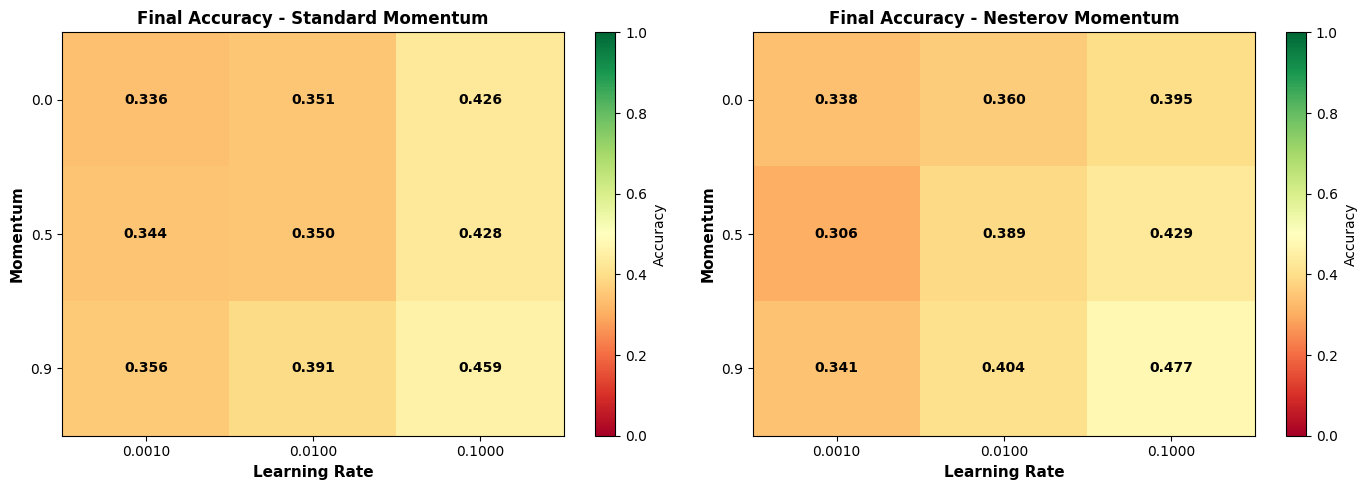



Heatmap visualization saved to 'optimizer_accuracy_heatmap.png'


/tmp/ipykernel_6028/3455719407.py:426: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([std_losses, nest_losses], labels=['Standard', 'Nesterov'])
/tmp/ipykernel_6028/3455719407.py:436: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([std_val_acc, nest_val_acc], labels=['Standard', 'Nesterov'])


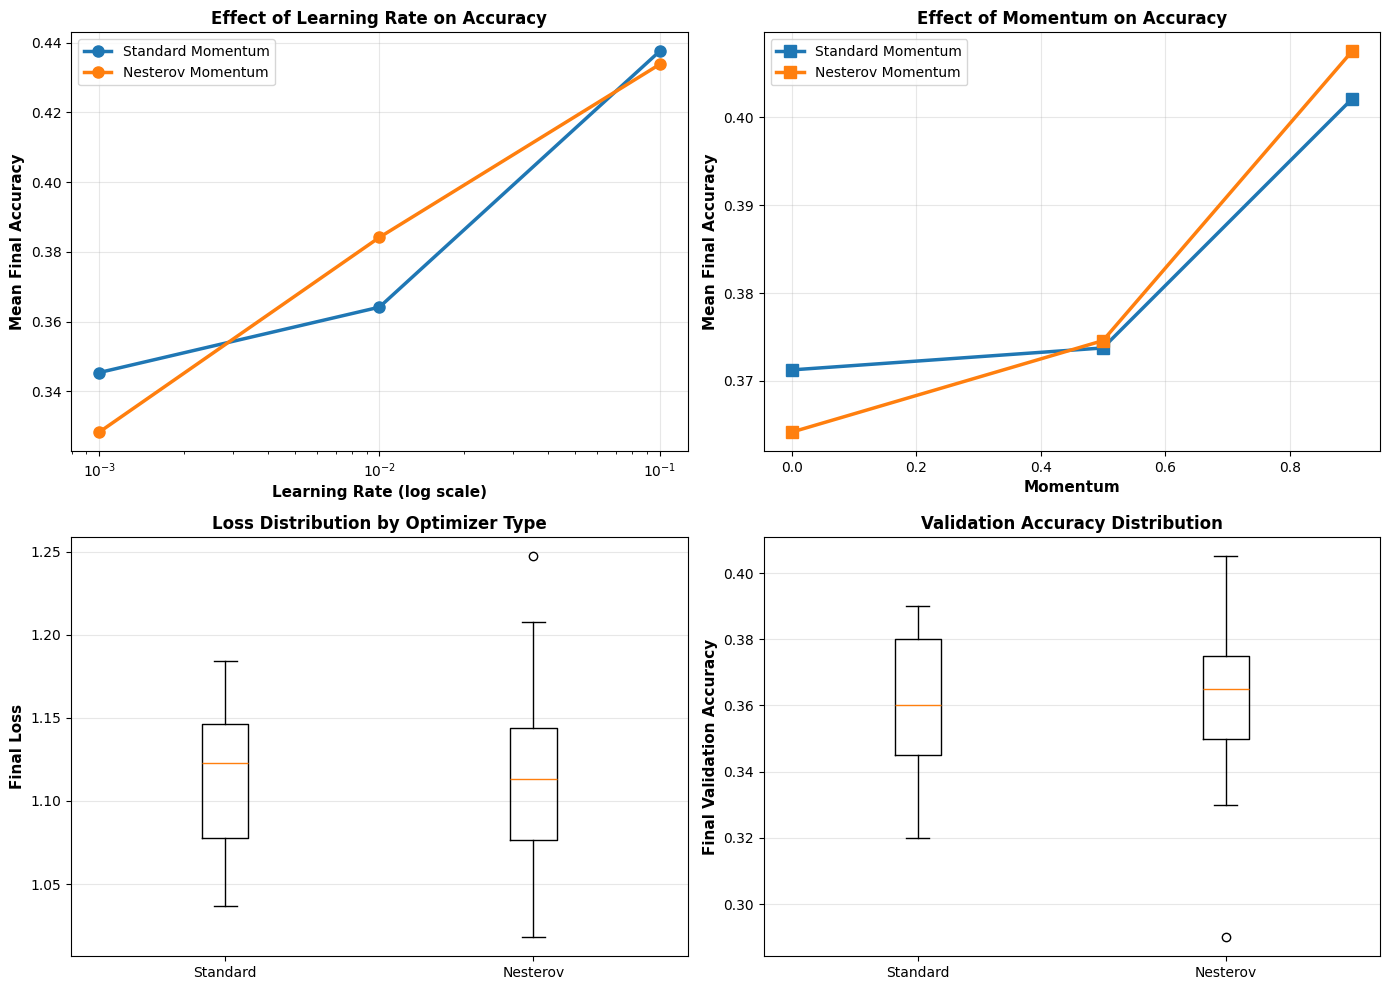

Parameter effects visualization saved to 'optimizer_parameter_effects.png'

TRAINING CURVE ANALYSIS


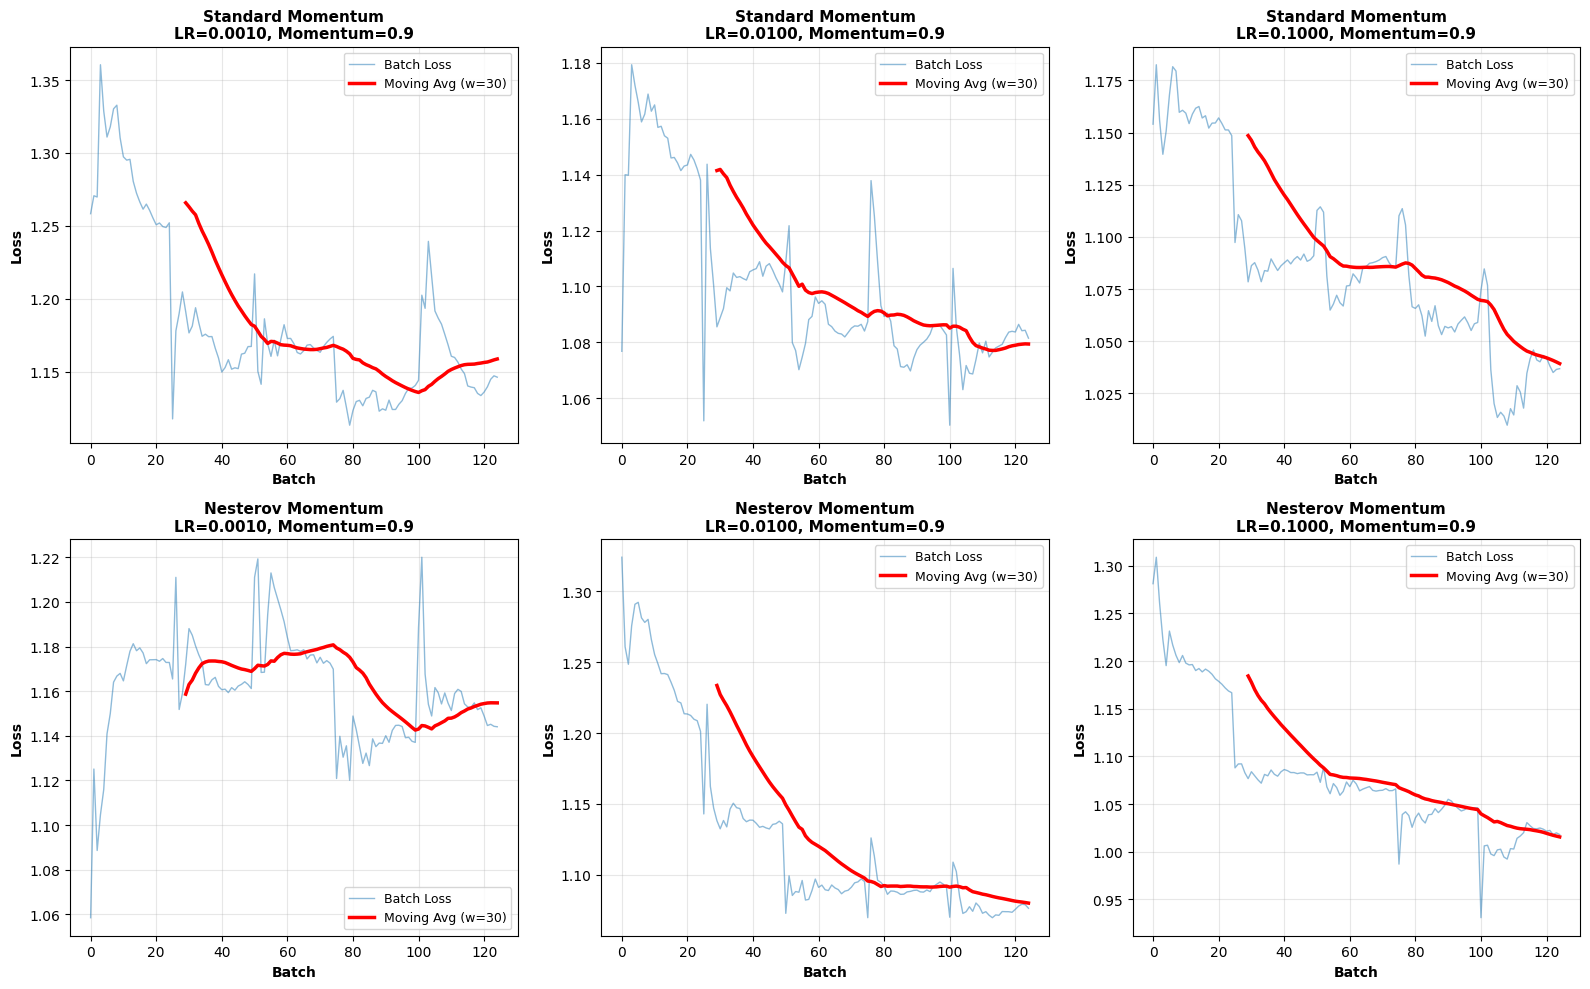

Training curve analysis saved to 'training_curves_by_params.png'



In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# ============================================================================
# GENERATE SAMPLE DATA
# ============================================================================

def generate_classification_data(num_samples=1000, num_features=20, num_classes=3, random_seed=42):
    """Generate synthetic classification data"""
    np.random.seed(random_seed)
    
    X = np.random.randn(num_samples, num_features).astype(np.float32)
    y = np.random.randint(0, num_classes, num_samples)
    
    return X, y

# Generate data
X_train, y_train = generate_classification_data(num_samples=1000, random_seed=42)
X_test, y_test = generate_classification_data(num_samples=200, random_seed=43)

print("=" * 80)
print("DATA GENERATION")
print("=" * 80)
print(f"Training data: X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
print(f"Test data: X_test shape = {X_test.shape}, y_test shape = {y_test.shape}")


# ============================================================================
# TRAINING MONITOR CALLBACK
# ============================================================================

class TrainingMonitor(keras.callbacks.Callback):
    """Custom callback to monitor batch-level metrics during training"""
    
    def __init__(self):
        super(TrainingMonitor, self).__init__()
        self.batch_losses = []
        self.loss_changes = []
        self.previous_loss = None
    
    def on_train_batch_end(self, batch, logs=None):
        """Called at the end of each training batch"""
        if logs is not None:
            current_loss = logs.get('loss')
            self.batch_losses.append(current_loss)
            
            # Calculate loss change from previous batch
            if self.previous_loss is not None:
                loss_change = self.previous_loss - current_loss
                self.loss_changes.append(loss_change)
            
            self.previous_loss = current_loss
    
    def on_epoch_end(self, epoch, logs=None):
        """Reset at epoch end"""
        self.previous_loss = None


# ============================================================================
# MODEL CREATION
# ============================================================================

def create_model(input_shape=20, num_classes=3):
    """Create a simple neural network for classification"""
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


# ============================================================================
# STUDENT TASK 3: CREATE SGD OPTIMIZER WITH PARAMETERS
# ============================================================================

def train_model_with_params(learning_rate, momentum, use_nesterov=False):
    """
    Trains model with specific learning rate and momentum settings
    
    Args:
        learning_rate: Learning rate for SGD
        momentum: Momentum coefficient
        use_nesterov: Whether to use Nesterov momentum
    
    Returns:
        Dictionary containing training history, batch-level metrics, and final performance
    """
    model = create_model(input_shape=X_train.shape[1], num_classes=3)
    
    # STUDENT TASK 3: Create SGD optimizer with given parameters
    # Use tf.keras.optimizers.SGD with momentum and nesterov options
    optimizer = tf.keras.optimizers.SGD(
        learning_rate=learning_rate,
        momentum=momentum,
        nesterov=use_nesterov
    )
    
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    monitor = TrainingMonitor()
    
    # Train for a small number of epochs
    history = model.fit(
        X_train, y_train,
        epochs=5,
        batch_size=32,
        validation_split=0.2,
        callbacks=[monitor],
        verbose=0
    )
    
    # Extract metrics from history, with safe defaults
    final_loss = history.history.get('loss', [np.inf])[-1]
    final_accuracy = history.history.get('accuracy', [0.0])[-1]
    final_val_loss = history.history.get('val_loss', [np.inf])[-1]
    final_val_accuracy = history.history.get('val_accuracy', [0.0])[-1]
    
    return {
        'model': model,
        'history': history.history,
        'batch_losses': monitor.batch_losses,
        'loss_changes': monitor.loss_changes,
        'final_loss': final_loss,
        'final_accuracy': final_accuracy,
        'final_val_loss': final_val_loss,
        'final_val_accuracy': final_val_accuracy
    }


# ============================================================================
# STUDENT TASK 4: RUN PARAMETER STUDY WITH NESTED LOOPS
# ============================================================================

def run_parameter_study(learning_rates, momentums):
    """
    Runs training with different combinations of learning rates and momentums
    
    Tests both standard momentum and Nesterov momentum variants
    
    Args:
        learning_rates: List of learning rates to test
        momentums: List of momentum values to test
    
    Returns:
        Dictionary organized by optimizer type containing results for each parameter combination
    """
    
    # Initialize results as a dictionary (not a list)
    results = {}
    results['standard_momentum'] = []
    results['nesterov_momentum'] = []
    
    total_experiments = len(learning_rates) * len(momentums) * 2  # 2 for standard + nesterov
    current_experiment = 0
    
    # STUDENT TASK 4: Create nested loops to test all combinations
    # Test with standard momentum (use_nesterov=False)
    print("\n" + "=" * 80)
    print("PARAMETER STUDY: STANDARD MOMENTUM")
    print("=" * 80)
    
    for lr in learning_rates:
        for mom in momentums:
            current_experiment += 1
            print(f"\n[{current_experiment}/{total_experiments}] Testing LR={lr:.4f}, Momentum={mom:.2f}")
            
            result = train_model_with_params(
                learning_rate=lr,
                momentum=mom,
                use_nesterov=False
            )
            
            result['learning_rate'] = lr
            result['momentum'] = mom
            result['optimizer_type'] = 'Standard Momentum'
            
            results['standard_momentum'].append(result)
            
            print(f"  Final Loss: {result['final_loss']:.6f}, Accuracy: {result['final_accuracy']:.4f}")
            print(f"  Val Loss: {result['final_val_loss']:.6f}, Val Accuracy: {result['final_val_accuracy']:.4f}")
    
    # Test with Nesterov momentum (use_nesterov=True)
    print("\n" + "=" * 80)
    print("PARAMETER STUDY: NESTEROV MOMENTUM")
    print("=" * 80)
    
    for lr in learning_rates:
        for mom in momentums:
            current_experiment += 1
            print(f"\n[{current_experiment}/{total_experiments}] Testing LR={lr:.4f}, Momentum={mom:.2f} (Nesterov)")
            
            result = train_model_with_params(
                learning_rate=lr,
                momentum=mom,
                use_nesterov=True
            )
            
            result['learning_rate'] = lr
            result['momentum'] = mom
            result['optimizer_type'] = 'Nesterov Momentum'
            
            results['nesterov_momentum'].append(result)
            
            print(f"  Final Loss: {result['final_loss']:.6f}, Accuracy: {result['final_accuracy']:.4f}")
            print(f"  Val Loss: {result['final_val_loss']:.6f}, Val Accuracy: {result['final_val_accuracy']:.4f}")
    
    return results


# ============================================================================
# DEFINE PARAMETER RANGES
# ============================================================================

learning_rates = [0.001, 0.01, 0.1]
momentums = [0.0, 0.5, 0.9]

print("\n" + "=" * 80)
print("PARAMETER STUDY CONFIGURATION")
print("=" * 80)
print(f"Learning rates to test: {learning_rates}")
print(f"Momentum values to test: {momentums}")
print(f"Total experiments: {len(learning_rates) * len(momentums) * 2}")


# ============================================================================
# RUN PARAMETER STUDY
# ============================================================================

print("\n" + "=" * 80)
print("RUNNING PARAMETER STUDY")
print("=" * 80)

results = run_parameter_study(learning_rates, momentums)


# ============================================================================
# CREATE RESULTS DATAFRAME
# ============================================================================

print("\n" + "=" * 80)
print("RESULTS SUMMARY")
print("=" * 80)

all_results = []
for optimizer_type, result_list in results.items():
    for result in result_list:
        all_results.append({
            'Optimizer Type': result['optimizer_type'],
            'Learning Rate': result['learning_rate'],
            'Momentum': result['momentum'],
            'Final Loss': result['final_loss'],
            'Final Accuracy': result['final_accuracy'],
            'Final Val Loss': result['final_val_loss'],
            'Final Val Accuracy': result['final_val_accuracy'],
            'Num Batch Losses': len(result['batch_losses'])
        })

results_df = pd.DataFrame(all_results)

print("\nDetailed Results Table:")
print(results_df.to_string(index=False))

# Save results to CSV
results_df.to_csv('optimizer_parameter_study.csv', index=False)
print("\n\nResults saved to 'optimizer_parameter_study.csv'")


# ============================================================================
# STATISTICAL ANALYSIS
# ============================================================================

print("\n" + "=" * 80)
print("STATISTICAL ANALYSIS")
print("=" * 80)

# Best performers by metric
print("\nBest Performers:")
print(f"  Best Final Accuracy: {results_df.loc[results_df['Final Accuracy'].idxmax()].to_dict()}")
print(f"  Best Val Accuracy: {results_df.loc[results_df['Final Val Accuracy'].idxmax()].to_dict()}")
print(f"  Lowest Final Loss: {results_df.loc[results_df['Final Loss'].idxmin()].to_dict()}")

# Compare optimizer types
print("\n\nPerformance by Optimizer Type:")
optimizer_comparison = results_df.groupby('Optimizer Type').agg({
    'Final Loss': ['mean', 'std', 'min', 'max'],
    'Final Accuracy': ['mean', 'std', 'min', 'max'],
    'Final Val Loss': ['mean', 'std', 'min', 'max'],
    'Final Val Accuracy': ['mean', 'std', 'min', 'max']
}).round(6)
print(optimizer_comparison)

# Analyze effect of learning rate
print("\n\nEffect of Learning Rate:")
lr_analysis = results_df.groupby('Learning Rate').agg({
    'Final Accuracy': 'mean',
    'Final Val Accuracy': 'mean',
    'Final Loss': 'mean'
}).round(6)
print(lr_analysis)

# Analyze effect of momentum
print("\n\nEffect of Momentum:")
momentum_analysis = results_df.groupby('Momentum').agg({
    'Final Accuracy': 'mean',
    'Final Val Accuracy': 'mean',
    'Final Loss': 'mean'
}).round(6)
print(momentum_analysis)


# ============================================================================
# VISUALIZATIONS
# ============================================================================

# Plot 1: Final Accuracy heatmap for Standard Momentum
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

standard_results = results_df[results_df['Optimizer Type'] == 'Standard Momentum']
nesterov_results = results_df[results_df['Optimizer Type'] == 'Nesterov Momentum']

# Reshape data for heatmap - Standard Momentum
std_pivot = standard_results.pivot_table(
    values='Final Accuracy',
    index='Momentum',
    columns='Learning Rate'
)

im1 = axes[0].imshow(std_pivot, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
axes[0].set_title('Final Accuracy - Standard Momentum', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Learning Rate', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Momentum', fontsize=11, fontweight='bold')
axes[0].set_xticks(range(len(std_pivot.columns)))
axes[0].set_xticklabels([f'{lr:.4f}' for lr in std_pivot.columns])
axes[0].set_yticks(range(len(std_pivot.index)))
axes[0].set_yticklabels([f'{m:.1f}' for m in std_pivot.index])

# Add text annotations
for i in range(len(std_pivot.index)):
    for j in range(len(std_pivot.columns)):
        text = axes[0].text(j, i, f'{std_pivot.iloc[i, j]:.3f}',
                           ha="center", va="center", color="black", fontweight='bold')

plt.colorbar(im1, ax=axes[0], label='Accuracy')

# Reshape data for heatmap - Nesterov Momentum
nest_pivot = nesterov_results.pivot_table(
    values='Final Accuracy',
    index='Momentum',
    columns='Learning Rate'
)

im2 = axes[1].imshow(nest_pivot, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
axes[1].set_title('Final Accuracy - Nesterov Momentum', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Learning Rate', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Momentum', fontsize=11, fontweight='bold')
axes[1].set_xticks(range(len(nest_pivot.columns)))
axes[1].set_xticklabels([f'{lr:.4f}' for lr in nest_pivot.columns])
axes[1].set_yticks(range(len(nest_pivot.index)))
axes[1].set_yticklabels([f'{m:.1f}' for m in nest_pivot.index])

# Add text annotations
for i in range(len(nest_pivot.index)):
    for j in range(len(nest_pivot.columns)):
        text = axes[1].text(j, i, f'{nest_pivot.iloc[i, j]:.3f}',
                           ha="center", va="center", color="black", fontweight='bold')

plt.colorbar(im2, ax=axes[1], label='Accuracy')

plt.tight_layout()
plt.savefig('optimizer_accuracy_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n\nHeatmap visualization saved to 'optimizer_accuracy_heatmap.png'")


# Plot 2: Learning Rate and Momentum Effects
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Learning Rate Effect
ax = axes[0, 0]
for opt_type in ['Standard Momentum', 'Nesterov Momentum']:
    data = results_df[results_df['Optimizer Type'] == opt_type]
    lr_effect = data.groupby('Learning Rate')['Final Accuracy'].mean()
    ax.plot(lr_effect.index, lr_effect.values, marker='o', linewidth=2.5, 
            markersize=8, label=opt_type)

ax.set_xlabel('Learning Rate (log scale)', fontsize=11, fontweight='bold')
ax.set_ylabel('Mean Final Accuracy', fontsize=11, fontweight='bold')
ax.set_title('Effect of Learning Rate on Accuracy', fontsize=12, fontweight='bold')
ax.set_xscale('log')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Momentum Effect
ax = axes[0, 1]
for opt_type in ['Standard Momentum', 'Nesterov Momentum']:
    data = results_df[results_df['Optimizer Type'] == opt_type]
    mom_effect = data.groupby('Momentum')['Final Accuracy'].mean()
    ax.plot(mom_effect.index, mom_effect.values, marker='s', linewidth=2.5,
            markersize=8, label=opt_type)

ax.set_xlabel('Momentum', fontsize=11, fontweight='bold')
ax.set_ylabel('Mean Final Accuracy', fontsize=11, fontweight='bold')
ax.set_title('Effect of Momentum on Accuracy', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Loss comparison
ax = axes[1, 0]
optimizer_types = results_df['Optimizer Type'].unique()
std_losses = results_df[results_df['Optimizer Type'] == 'Standard Momentum']['Final Loss'].values
nest_losses = results_df[results_df['Optimizer Type'] == 'Nesterov Momentum']['Final Loss'].values

ax.boxplot([std_losses, nest_losses], labels=['Standard', 'Nesterov'])
ax.set_ylabel('Final Loss', fontsize=11, fontweight='bold')
ax.set_title('Loss Distribution by Optimizer Type', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

# Validation Accuracy comparison
ax = axes[1, 1]
std_val_acc = results_df[results_df['Optimizer Type'] == 'Standard Momentum']['Final Val Accuracy'].values
nest_val_acc = results_df[results_df['Optimizer Type'] == 'Nesterov Momentum']['Final Val Accuracy'].values

ax.boxplot([std_val_acc, nest_val_acc], labels=['Standard', 'Nesterov'])
ax.set_ylabel('Final Validation Accuracy', fontsize=11, fontweight='bold')
ax.set_title('Validation Accuracy Distribution', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('optimizer_parameter_effects.png', dpi=150, bbox_inches='tight')
plt.show()

print("Parameter effects visualization saved to 'optimizer_parameter_effects.png'")


# ============================================================================
# TRAINING CURVE ANALYSIS
# ============================================================================

print("\n" + "=" * 80)
print("TRAINING CURVE ANALYSIS")
print("=" * 80)

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Select representative configurations to visualize
configs_to_plot = [
    ('Standard Momentum', 0.001, 0.9),
    ('Standard Momentum', 0.01, 0.9),
    ('Standard Momentum', 0.1, 0.9),
    ('Nesterov Momentum', 0.001, 0.9),
    ('Nesterov Momentum', 0.01, 0.9),
    ('Nesterov Momentum', 0.1, 0.9),
]

for idx, (opt_type, lr, mom) in enumerate(configs_to_plot):
    ax = axes[idx // 3, idx % 3]
    
    if opt_type == 'Standard Momentum':
        result = [r for r in results['standard_momentum'] 
                 if r['learning_rate'] == lr and r['momentum'] == mom][0]
    else:
        result = [r for r in results['nesterov_momentum']
                 if r['learning_rate'] == lr and r['momentum'] == mom][0]
    
    # Plot batch losses with moving average
    batch_losses = result['batch_losses']
    epochs = np.arange(len(batch_losses))
    
    ax.plot(epochs, batch_losses, alpha=0.5, linewidth=1, label='Batch Loss')
    
    # Add moving average
    window = 30
    if len(batch_losses) > window:
        moving_avg = pd.Series(batch_losses).rolling(window=window).mean()
        ax.plot(epochs, moving_avg, linewidth=2.5, label=f'Moving Avg (w={window})', color='red')
    
    ax.set_xlabel('Batch', fontsize=10, fontweight='bold')
    ax.set_ylabel('Loss', fontsize=10, fontweight='bold')
    title = f'{opt_type}\nLR={lr:.4f}, Momentum={mom:.1f}'
    ax.set_title(title, fontsize=11, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_curves_by_params.png', dpi=150, bbox_inches='tight')
plt.show()

print("Training curve analysis saved to 'training_curves_by_params.png'")

print("\n" + "=" * 80)

In [19]:
def train_model_with_params(learning_rate, momentum, use_nesterov=False):
    """Trains model with specific learning rate and momentum settings"""
    model = create_model()
    
    # STUDENT TASK 3: Create SGD optimizer with given parameters
    optimizer = tf.keras.optimizers.SGD(
        learning_rate=learning_rate,
        momentum=momentum,
        nesterov=use_nesterov
    )
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    monitor = TrainingMonitor()
    
    # Train for a small number of epochs
    history = model.fit(
        X_train, y_train,
        epochs=5,
        batch_size=32,
        validation_split=0.2,
        callbacks=[monitor],
        verbose=0
    )
    
    return {
        'history': history.history,
        'batch_losses': monitor.batch_losses,
        'loss_changes': monitor.loss_changes,
        'final_loss': history.history['loss'][-1],
        'final_accuracy': history.history['accuracy'][-1]
    }

def run_parameter_study(learning_rates, momentums):
    """Runs training with different combinations of learning rates and momentums"""
    results = {}
    results['standard_momentum'] = []
    results['nesterov_momentum'] = []
    #     # STUDENT TASK 4: Create nested loops to test all combinations
    #     # Include both standard momentum and Nesterov momentum
    total_experiments = len(learning_rates) * len(momentums) * 2  # 2 for standard + nesterov
    current_experiment = 0
    print("\n" + "=" * 80)
    print("PARAMETER STUDY: STANDARD MOMENTUM")
    print("=" * 80)
    
    for lr in learning_rates:
        for mom in momentums:
            current_experiment += 1
            print(f"\n[{current_experiment}/{total_experiments}] Testing LR={lr:.4f}, Momentum={mom:.2f}")
            
            result = train_model_with_params(
                learning_rate=lr,
                momentum=mom,
                use_nesterov=False
            )
            
            result['learning_rate'] = lr
            result['momentum'] = mom
            result['optimizer_type'] = 'Standard Momentum'
            
            results['standard_momentum'].append(result)
            
            print(f"  Final Loss: {result['final_loss']:.6f}, Accuracy: {result['final_accuracy']:.4f}")
            print(f"  Val Loss: {result['final_val_loss']:.6f}, Val Accuracy: {result['final_val_accuracy']:.4f}")
    
    # Test with Nesterov momentum (use_nesterov=True)
    print("\n" + "=" * 80)
    print("PARAMETER STUDY: NESTEROV MOMENTUM")
    print("=" * 80)
    
    for lr in learning_rates:
        for mom in momentums:
            current_experiment += 1
            print(f"\n[{current_experiment}/{total_experiments}] Testing LR={lr:.4f}, Momentum={mom:.2f} (Nesterov)")
            
            result = train_model_with_params(
                learning_rate=lr,
                momentum=mom,
                use_nesterov=True
            )
            
            result['learning_rate'] = lr
            result['momentum'] = mom
            result['optimizer_type'] = 'Nesterov Momentum'
            
            results['nesterov_momentum'].append(result)
            
            print(f"  Final Loss: {result['final_loss']:.6f}, Accuracy: {result['final_accuracy']:.4f}")
            print(f"  Val Loss: {result['final_val_loss']:.6f}, Val Accuracy: {result['final_val_accuracy']:.4f}")
    
    return results

learning_rates = [0.001, 0.01, 0.1]
momentums = [0.0, 0.5, 0.9]

print("\n" + "=" * 80)
print("PARAMETER STUDY CONFIGURATION")
print("=" * 80)
print(f"Learning rates to test: {learning_rates}")
print(f"Momentum values to test: {momentums}")
print(f"Total experiments: {len(learning_rates) * len(momentums) * 2}")

print("\n" + "=" * 80)
print("RUNNING PARAMETER STUDY")
print("=" * 80)

results = run_parameter_study(learning_rates, momentums)


# ============================================================================
# CREATE RESULTS DATAFRAME
# ============================================================================

print("\n" + "=" * 80)
print("RESULTS SUMMARY")
print("=" * 80)

all_results = []
for optimizer_type, result_list in results.items():
    for result in result_list:
        all_results.append({
            'Optimizer Type': result['optimizer_type'],
            'Learning Rate': result['learning_rate'],
            'Momentum': result['momentum'],
            'Final Loss': result['final_loss'],
            'Final Accuracy': result['final_accuracy'],
            'Final Val Loss': result['final_val_loss'],
            'Final Val Accuracy': result['final_val_accuracy'],
            'Num Batch Losses': len(result['batch_losses'])
        })

results_df = pd.DataFrame(all_results)

print("\nDetailed Results Table:")
print(results_df.to_string(index=False))

# Save results to CSV
results_df.to_csv('optimizer_parameter_study.csv', index=False)
print("\n\nResults saved to 'optimizer_parameter_study.csv'")

print("\n" + "=" * 80)
print("STATISTICAL ANALYSIS")
print("=" * 80)

# Best performers by metric
print("\nBest Performers:")
print(f"  Best Final Accuracy: {results_df.loc[results_df['Final Accuracy'].idxmax()].to_dict()}")
print(f"  Best Val Accuracy: {results_df.loc[results_df['Final Val Accuracy'].idxmax()].to_dict()}")
print(f"  Lowest Final Loss: {results_df.loc[results_df['Final Loss'].idxmin()].to_dict()}")

# Compare optimizer types
print("\n\nPerformance by Optimizer Type:")
optimizer_comparison = results_df.groupby('Optimizer Type').agg({
    'Final Loss': ['mean', 'std', 'min', 'max'],
    'Final Accuracy': ['mean', 'std', 'min', 'max'],
    'Final Val Loss': ['mean', 'std', 'min', 'max'],
    'Final Val Accuracy': ['mean', 'std', 'min', 'max']
}).round(6)
print(optimizer_comparison)

# Analyze effect of learning rate
print("\n\nEffect of Learning Rate:")
lr_analysis = results_df.groupby('Learning Rate').agg({
    'Final Accuracy': 'mean',
    'Final Val Accuracy': 'mean',
    'Final Loss': 'mean'
}).round(6)
print(lr_analysis)

# Analyze effect of momentum
print("\n\nEffect of Momentum:")
momentum_analysis = results_df.groupby('Momentum').agg({
    'Final Accuracy': 'mean',
    'Final Val Accuracy': 'mean',
    'Final Loss': 'mean'
}).round(6)
print(momentum_analysis)


PARAMETER STUDY CONFIGURATION
Learning rates to test: [0.001, 0.01, 0.1]
Momentum values to test: [0.0, 0.5, 0.9]
Total experiments: 18

RUNNING PARAMETER STUDY

PARAMETER STUDY: STANDARD MOMENTUM

[1/18] Testing LR=0.0010, Momentum=0.00
  Final Loss: 1.375706, Accuracy: 0.6440


KeyError: 'final_val_loss'



## Part 3: Visualization Functions



In [ ]:
def create_heatmaps(results_df):
    """Creates heatmaps for loss and stability across parameter combinations"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))

    # STUDENT TASK 5: Create four heatmaps
    
    # Standard momentum accuracy
    
    # Nesterov momentum accuracy
    
    # Standard momentum stability (using loss changes)
    
    # Nesterov momentum stability
    



## Part 4: Running the Experiment



In [ ]:
# Define parameter ranges
learning_rates = [0.001, 0.01, 0.1, 0.5]
momentums = [0.0, 0.5, 0.9, 0.99]

# Run the study

# Create visualizations

# Print best configurations


# Exercise 3: Adaptive Learning Rate Emergency

In this exercise, you'll implement a custom callback that monitors training stability and automatically adjusts the learning rate when problems are detected. This represents a real-world scenario where you need to rescue training that's becoming unstable.

## Setup and Imports



In [94]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import logging

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load and preprocess Fashion MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0



## Part 1: Training Monitor Callback



In [ ]:
class TrainingEmergencyCallback(tf.keras.callbacks.Callback):
    def __init__(self, 
                 patience=5,
                 loss_spike_threshold=1.5,
                 min_lr=1e-6):
        super().__init__()
        self.patience = patience
        self.loss_spike_threshold = loss_spike_threshold
        self.min_lr = min_lr
        
        self.loss_history = []
        self.lr_history = []
    
    def on_train_begin(self, logs=None):
        # STUDENT TASK 1: Initialize monitoring variables
        # Keep track of consecutive problems and best loss
        pass
        
        
    def check_training_problems(self, logs):
        """Checks for potential training problems"""
        current_loss = logs['loss']
        current_lr = tf.keras.backend.get_value(self.model.optimizer.learning_rate)
        
        # Store history
        self.loss_history.append(current_loss)
        self.lr_history.append(current_lr)
        
        problems = []
        
        # Check for loss spikes
        if len(self.loss_history) > 1:
            avg_previous_loss = np.mean(self.loss_history[-5:]) if len(self.loss_history) >= 5 else self.loss_history[-1]
            if current_loss > avg_previous_loss * self.loss_spike_threshold:
                problems.append("Loss spike detected")
        
        # Check for NaN/Inf
        if np.isnan(current_loss) or np.isinf(current_loss):
            problems.append("NaN/Inf values detected")
            
        # Check for consistently increasing loss
        if len(self.loss_history) >= 5:
            if all(x < y for x, y in zip(self.loss_history[-5:], self.loss_history[-4:])):
                problems.append("Consistently increasing loss")
                
        return problems
    
    def adjust_learning_rate(self, problems):
        """Adjusts learning rate based on detected problems"""
        current_lr = tf.keras.backend.get_value(self.model.optimizer.learning_rate)
        

        if problems:
            # STUDENT TASK 4: Implement learning rate adjustment
            # Reduce learning rate if there are problems
            # Make sure new lr isn't below min_lr
            pass
        return False
    
    def on_batch_end(self, batch, logs=None):
        problems = self.check_training_problems(logs)
        
        if problems:
            self.consecutive_problems += 1
            logger.info(f"Training problems detected: {problems}")
            
            if self.consecutive_problems >= self.patience:
                logger.warning(f"Exceeded patience - adjusting learning rate")
                self.adjust_learning_rate(problems)
                self.consecutive_problems = 0
        else:
            self.consecutive_problems = 0
            current_loss = logs['loss']
            if current_loss < self.best_loss:
                self.best_loss = current_loss





## Part 2: Training Function



In [ ]:
def create_model():
    """Creates a model prone to training instability"""
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

def train_with_emergency_monitoring(initial_lr=0.1, epochs=10, patience=3):
    """Trains model with emergency monitoring"""
    model = create_model()
    
    # STUDENT TASK 5: Create optimizer and compile model
    
    # Create callback
    
    # Train model
    
    
    return history, emergency_cb



## Part 3: Visualization



In [ ]:
def plot_training_metrics(callback):
    """Visualizes training metrics and learning rate adjustments"""
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(12, 12))
    
    # Plot loss history
    ax1.plot(callback.loss_history)
    ax1.set_title('Training Loss')
    ax1.set_ylabel('Loss')
    ax1.grid(True)
    

    
    # Plot learning rate changes
    ax3.plot(callback.lr_history)
    ax3.set_title('Learning Rate')
    ax3.set_ylabel('Learning Rate')
    ax3.set_yscale('log')
    ax3.grid(True)
    
    plt.tight_layout()
    plt.show()

logger = logging.getLogger()
logger.setLevel(logging.WARNING)

# Run training
history, callback = train_with_emergency_monitoring(patience=5)
plot_training_metrics(callback)